In [18]:
import os
import glob
import numpy as np
from tqdm import tqdm
import matplotlib.pyplot as plt

import torch
import torch.nn as nn
import torch.nn.functional as F
from torchvision import transforms

from dataloader.amosloader import AMOSDataset, AMOSDataset3D
from guided_diffusion.upsample import Upsample
from guided_diffusion.downsample import Downsample

In [19]:

class SmoothingLayer(nn.Module):
    def __init__(self, 
                 image_size, 
                 crop_size,
                 dropout=True, 
                 dims=2,
                 debug=True):
        super(SmoothingLayer, self).__init__()
        
        self.image_size = image_size
        self.crop_size = crop_size
        self.debug = debug
        
        # CNN 레이어 추가
        self.conv_layers = nn.Sequential(
            nn.Conv2d(crop_size, 64, kernel_size=3, padding=1),
            nn.ReLU(),
            nn.Conv2d(64, 128, kernel_size=3, padding=1),
            nn.ReLU(),
        )
        
        self.output_layer = nn.Sequential(
            nn.Conv2d(128, crop_size, kernel_size=3, padding=1),
            nn.ReLU(),
        )

    def forward(self, x):
        x = self.conv_layers(x)
        x = self.output_layer(x)
        # if self.debug: print(x.shape)
        return x

In [20]:
data_dir = "dataset/AMOS"
image_size = 256
crop_size = 96
padding = True
in_channels = 3
model_channels = 128
batch_size = 1
num_epochs = 100

device = torch.device("cuda:0")

model = SmoothingLayer(
    image_size=image_size,
    crop_size=crop_size,
    debug=True
)

transform = transforms.Compose([transforms.Resize((image_size, image_size))])

dataset = AMOSDataset3D(data_dir, transform, crop_size, padding, test_flag=False)
dataloader = torch.utils.data.DataLoader(
            dataset,
            batch_size=batch_size,
            shuffle=True)

data = iter(dataloader)

print("Load dataset...")

optimizer = torch.optim.AdamW(model.parameters(), lr=0.0001)
loss = torch.nn.SmoothL1Loss()

model.to(device)
# optimizer = optimizer.to(device)
loss.to(device)

model.train()

Load dataset...


SmoothingLayer(
  (conv_layers): Sequential(
    (0): Conv2d(96, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): ReLU()
    (2): Conv2d(64, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (3): ReLU()
  )
  (output_layer): Sequential(
    (0): Conv2d(128, 96, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): ReLU()
  )
)

  0%|          | 0/240 [00:00<?, ?it/s]

Loss: 0.0016


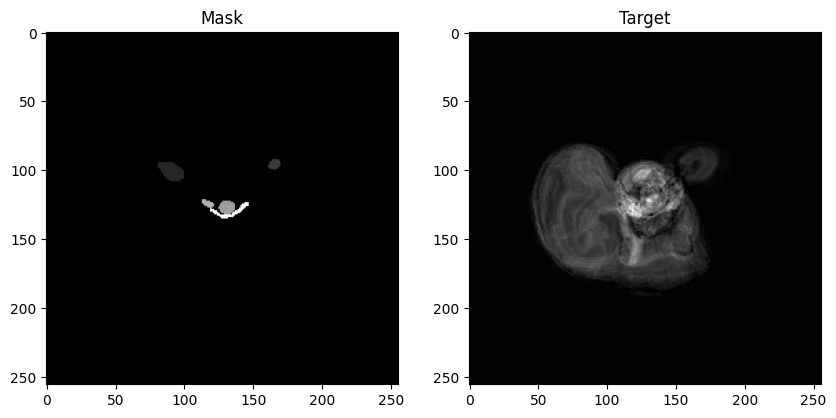

  0%|          | 1/240 [00:02<11:30,  2.89s/it]

Loss: 0.0038


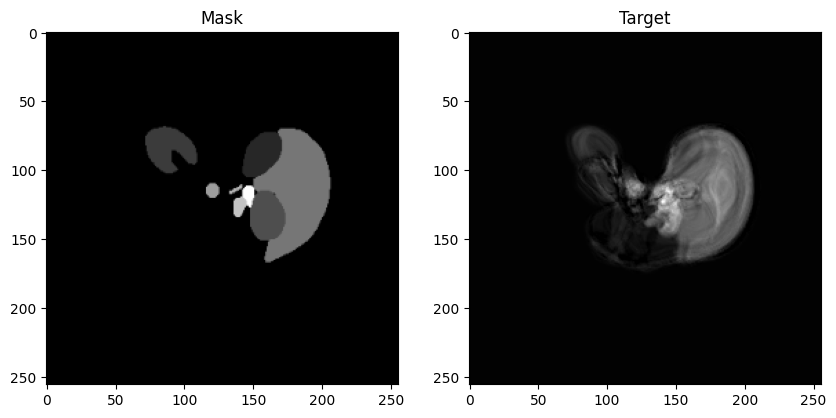

  1%|          | 2/240 [00:03<06:45,  1.70s/it]

Loss: 0.0070


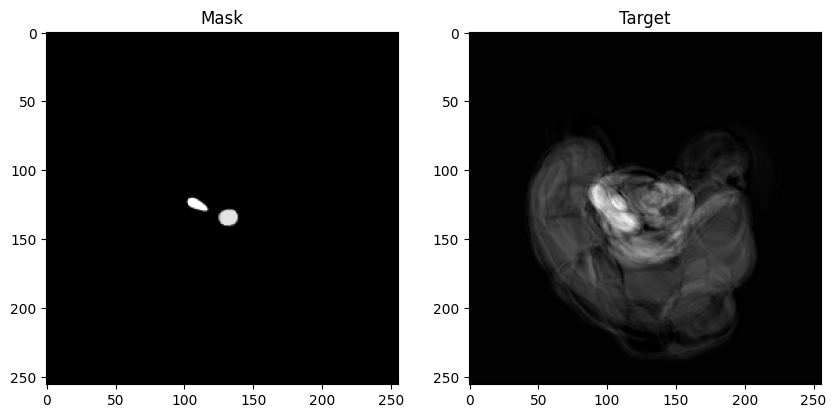

  1%|▏         | 3/240 [00:06<08:16,  2.09s/it]

Loss: 0.0099


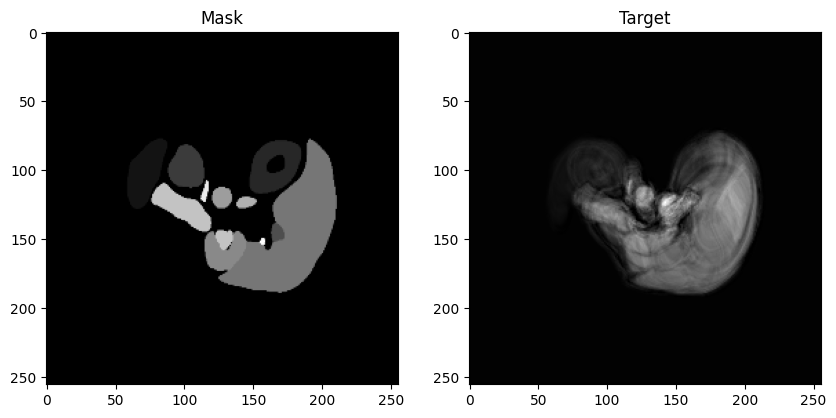

  2%|▏         | 4/240 [00:07<06:43,  1.71s/it]

Loss: 0.0114


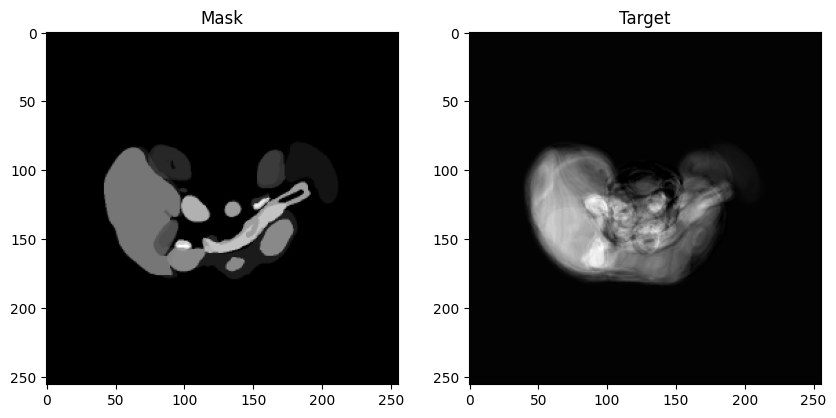

  2%|▏         | 5/240 [00:09<07:26,  1.90s/it]

Loss: 0.0123


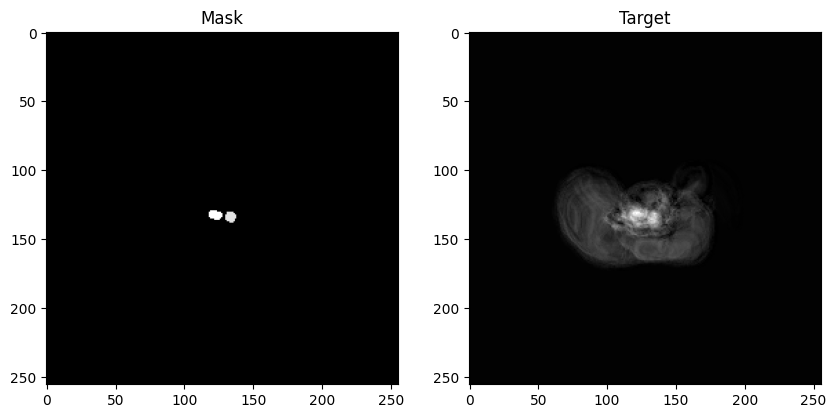

  2%|▎         | 6/240 [00:11<07:46,  2.00s/it]

Loss: 0.0200


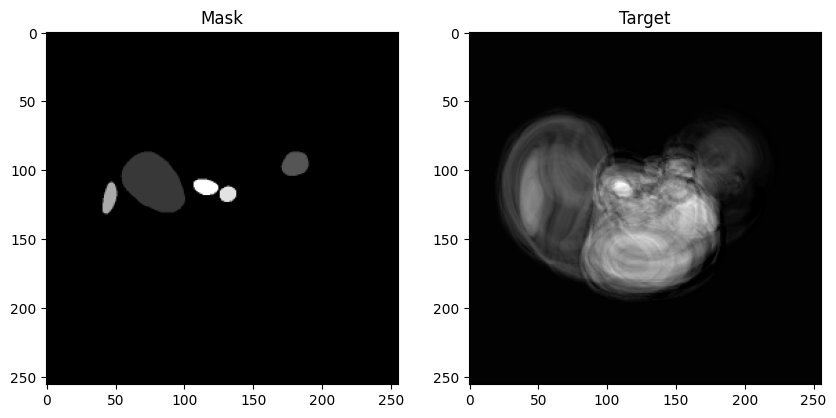

  3%|▎         | 7/240 [00:14<08:03,  2.08s/it]

Loss: 0.0213


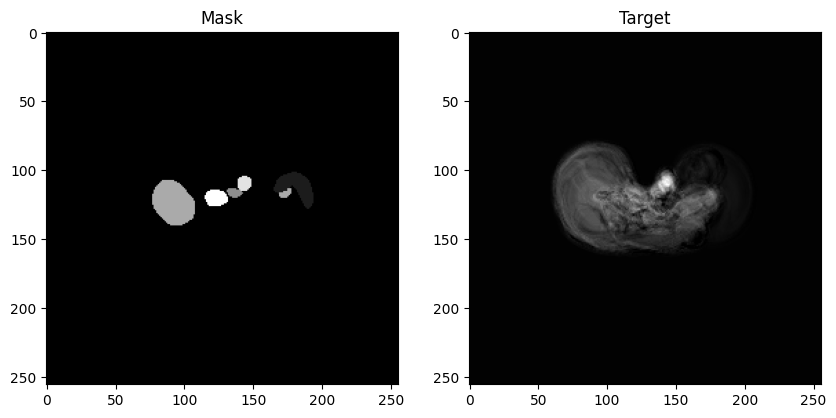

  3%|▎         | 8/240 [00:16<08:57,  2.32s/it]

Loss: 0.0229


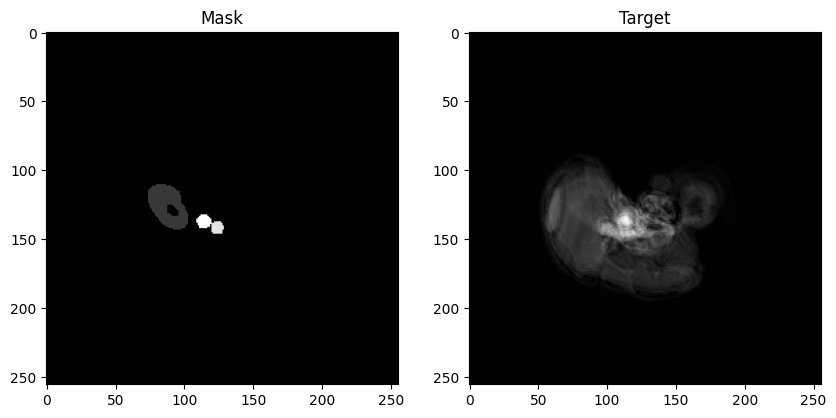

  4%|▍         | 9/240 [00:19<09:21,  2.43s/it]

Loss: 0.0244


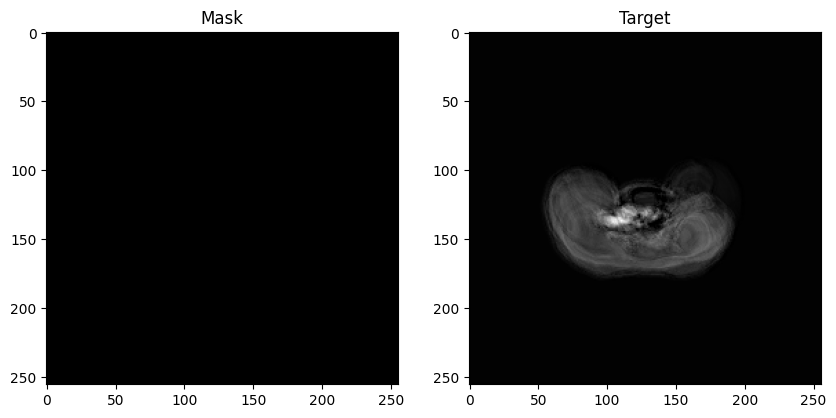

  4%|▍         | 10/240 [00:22<09:44,  2.54s/it]

Loss: 0.0257


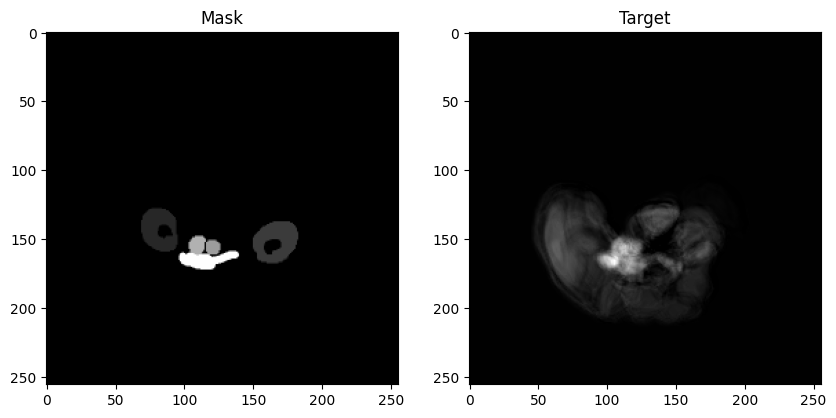

  5%|▍         | 11/240 [00:23<08:34,  2.25s/it]

Loss: 0.0280


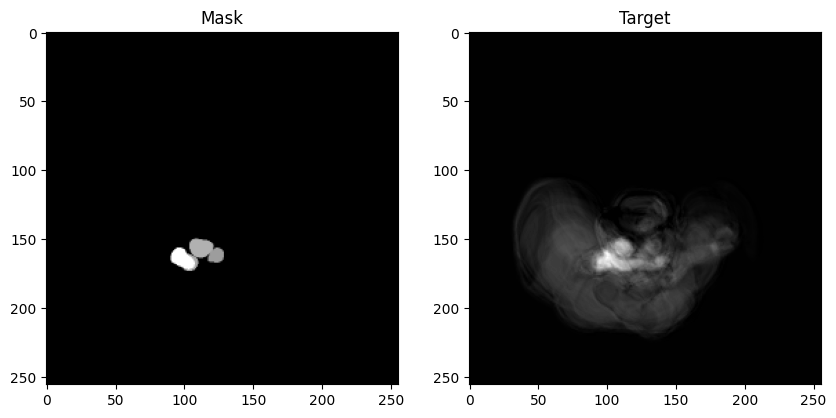

  5%|▌         | 12/240 [00:26<08:38,  2.27s/it]

Loss: 0.0309


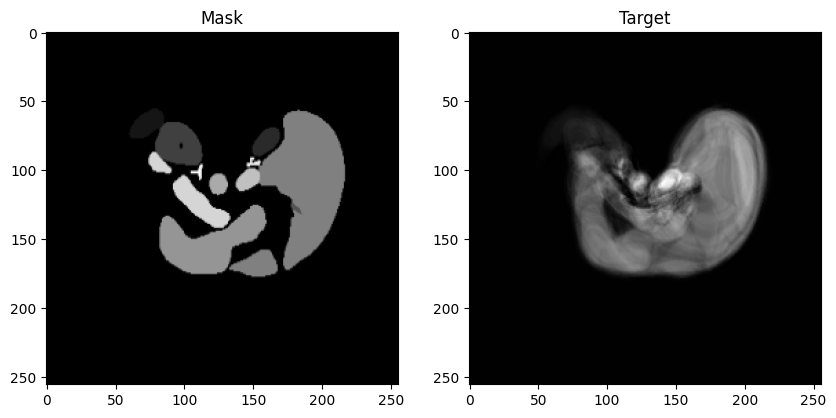

  5%|▌         | 13/240 [00:26<06:38,  1.76s/it]

Loss: 0.0326


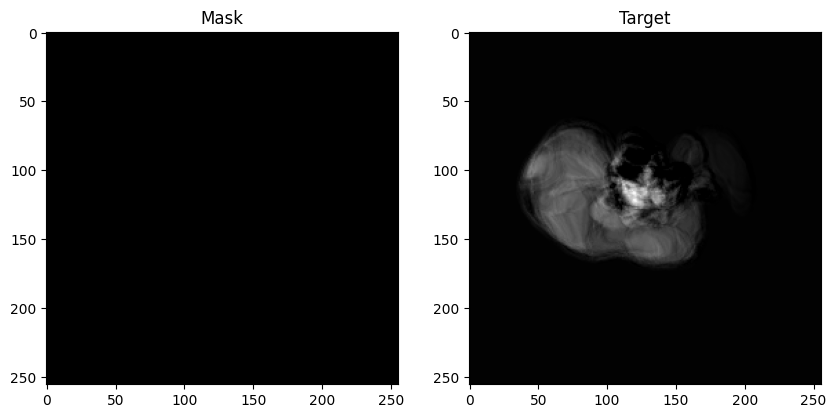

  6%|▌         | 14/240 [00:28<06:31,  1.73s/it]

Loss: 0.0336


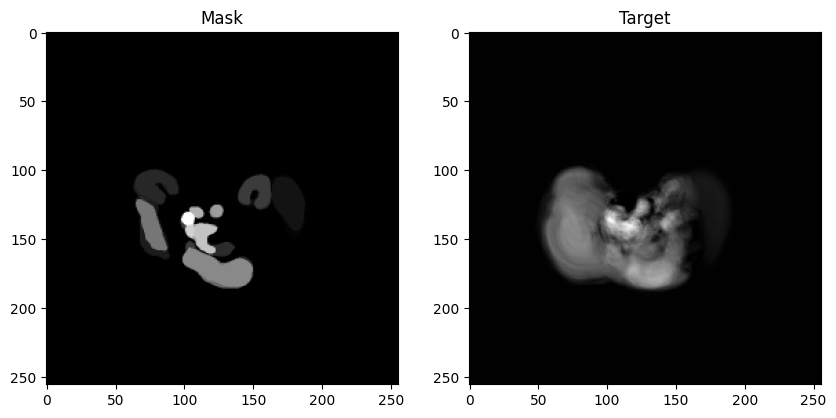

  6%|▋         | 15/240 [00:30<06:36,  1.76s/it]

Loss: 0.0353


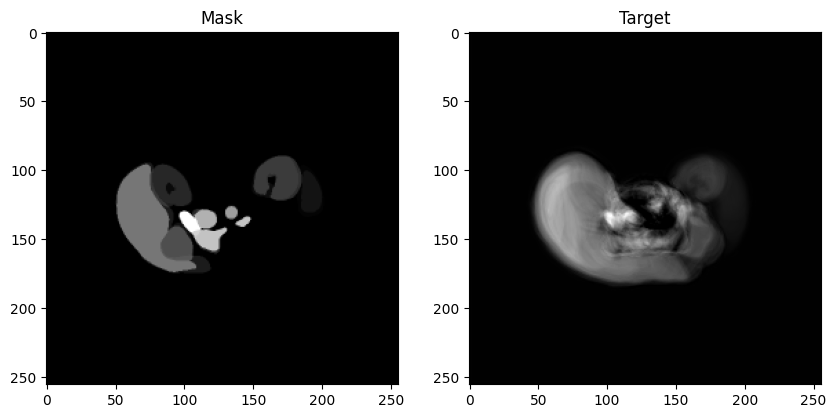

  7%|▋         | 16/240 [00:32<07:24,  1.99s/it]

Loss: 0.0362


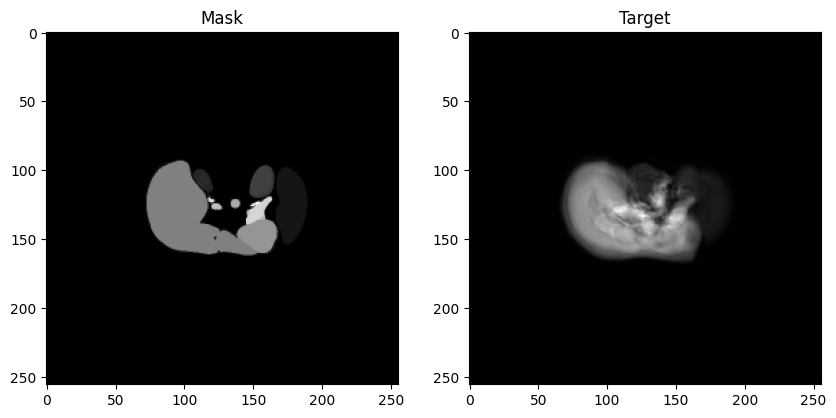

  7%|▋         | 17/240 [00:34<06:46,  1.82s/it]

Loss: 0.0385


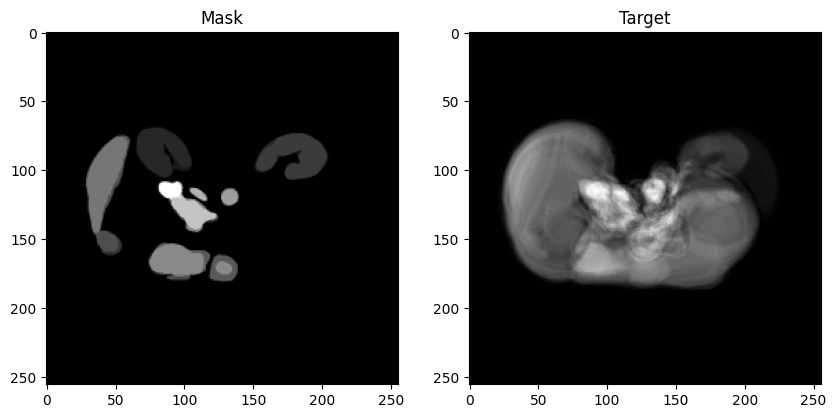

  8%|▊         | 18/240 [00:37<08:26,  2.28s/it]

Loss: 0.0395


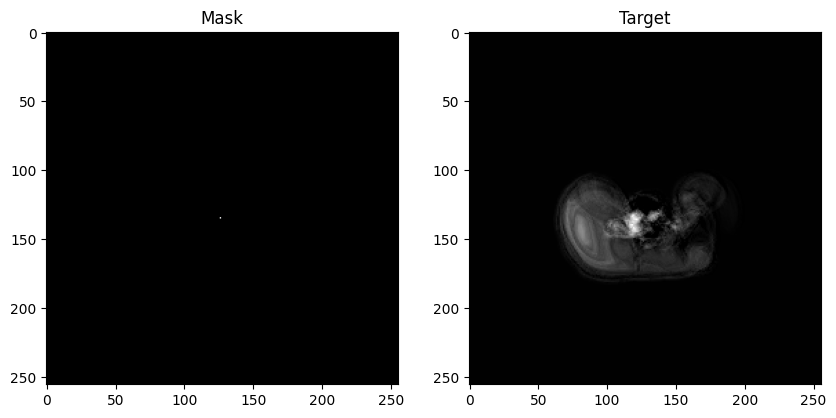

  8%|▊         | 19/240 [00:39<08:16,  2.25s/it]

Loss: 0.0407


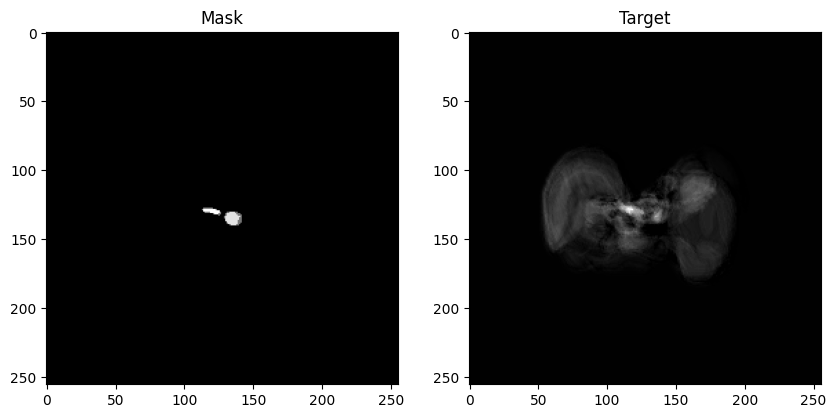

  8%|▊         | 20/240 [00:42<08:24,  2.29s/it]

Loss: 0.0427


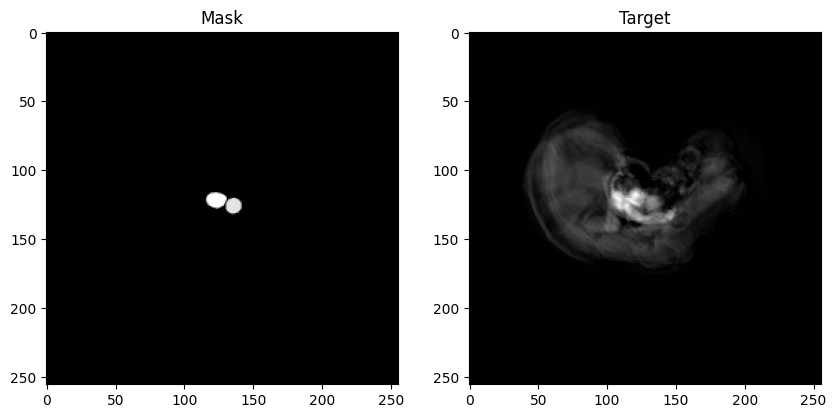

  9%|▉         | 21/240 [00:45<09:15,  2.54s/it]

Loss: 0.0450


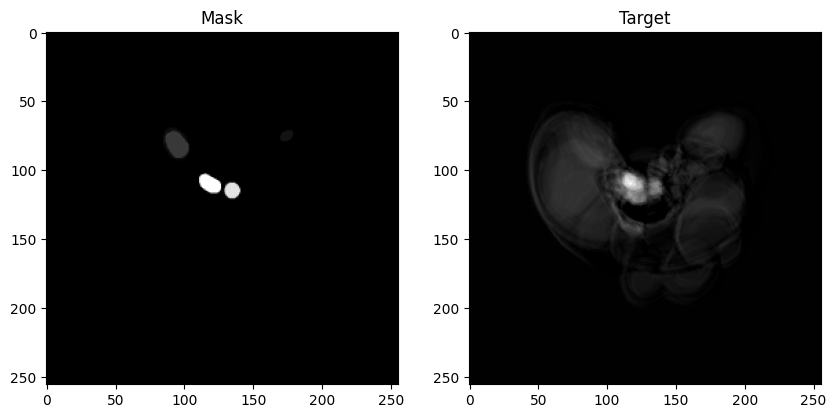

  9%|▉         | 22/240 [00:48<10:22,  2.86s/it]

Loss: 0.0465


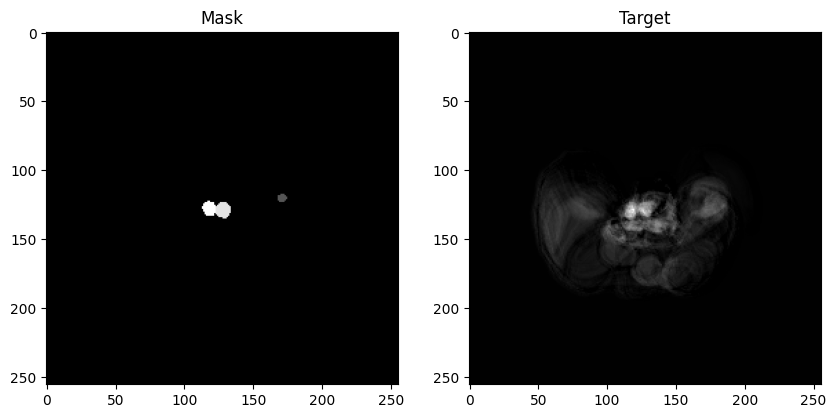

 10%|▉         | 23/240 [00:52<11:08,  3.08s/it]

Loss: 0.0497


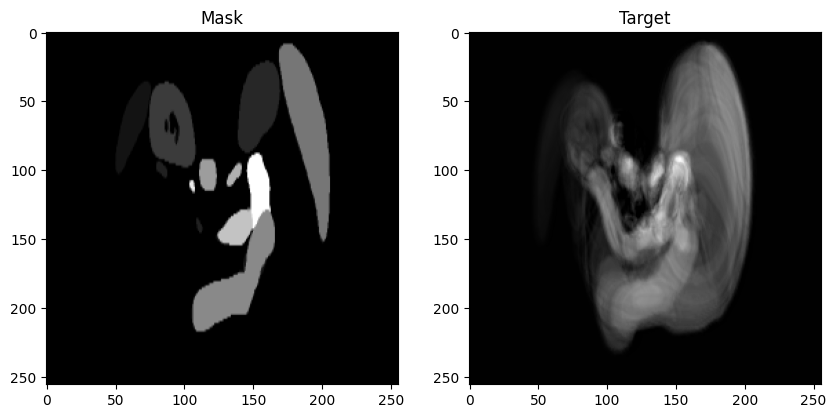

 10%|█         | 24/240 [00:55<10:45,  2.99s/it]

Loss: 0.0521


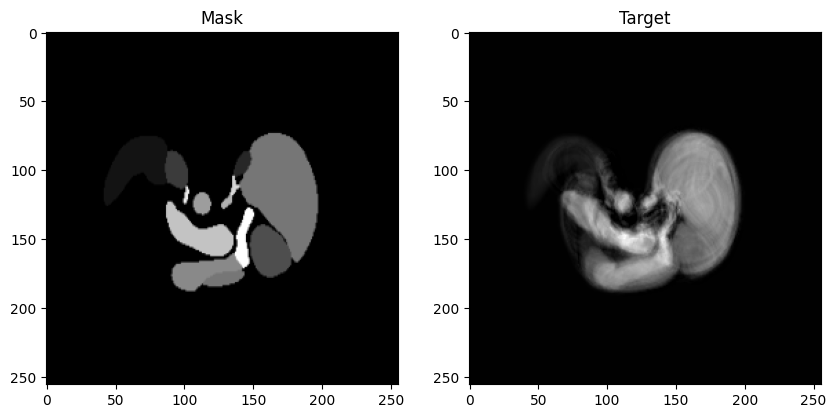

 10%|█         | 25/240 [00:55<08:02,  2.25s/it]

Loss: 0.0542


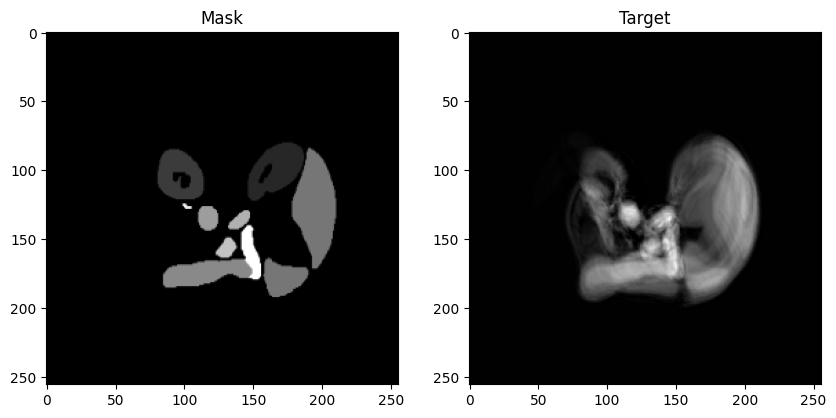

 11%|█         | 26/240 [00:56<06:24,  1.80s/it]

Loss: 0.0555


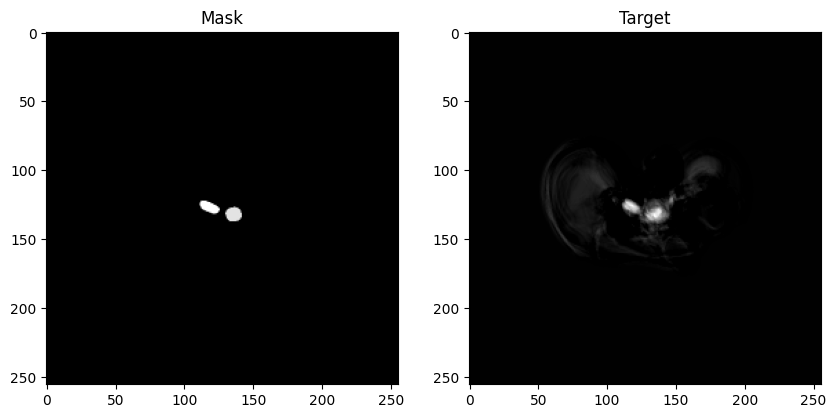

 11%|█▏        | 27/240 [00:57<05:42,  1.61s/it]

Loss: 0.0566


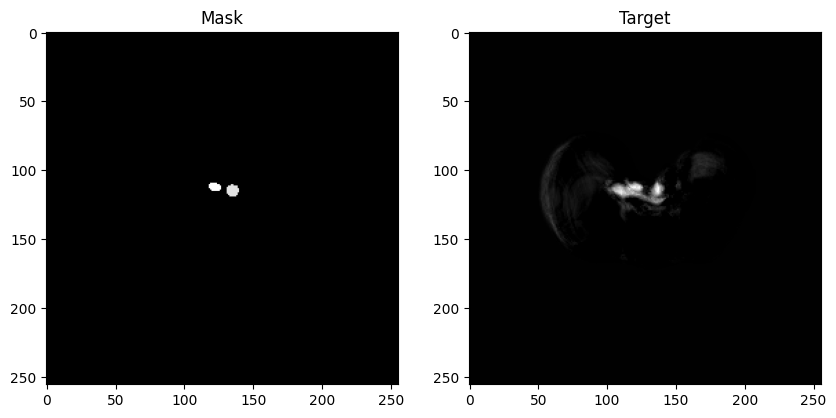

 12%|█▏        | 28/240 [01:01<07:27,  2.11s/it]

Loss: 0.0575


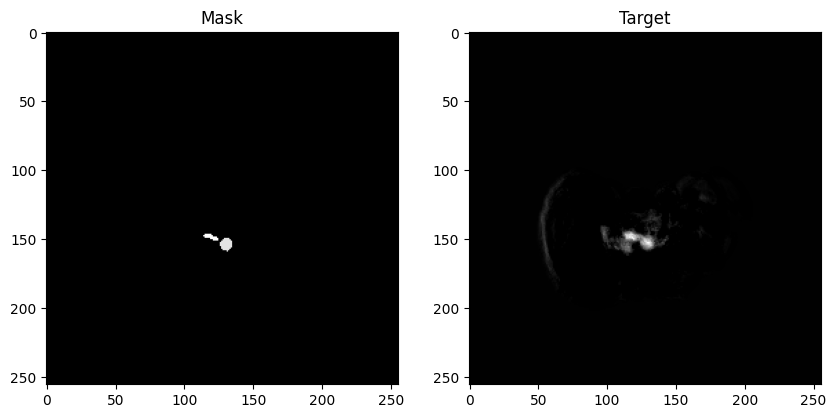

 12%|█▏        | 29/240 [01:04<08:41,  2.47s/it]

Loss: 0.0584


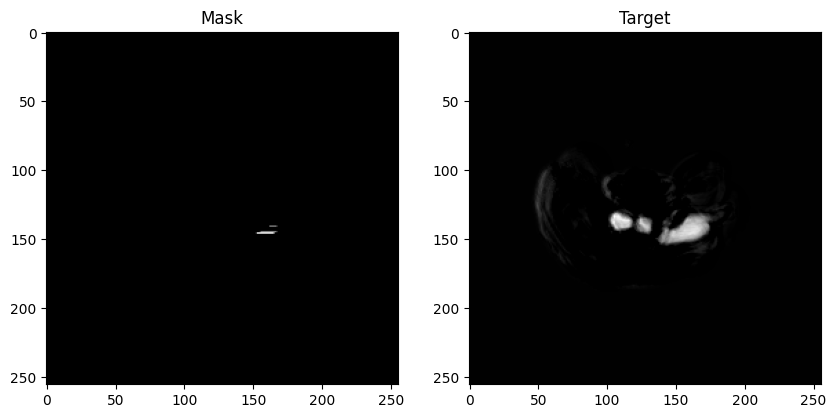

 12%|█▎        | 30/240 [01:05<07:31,  2.15s/it]

Loss: 0.0595


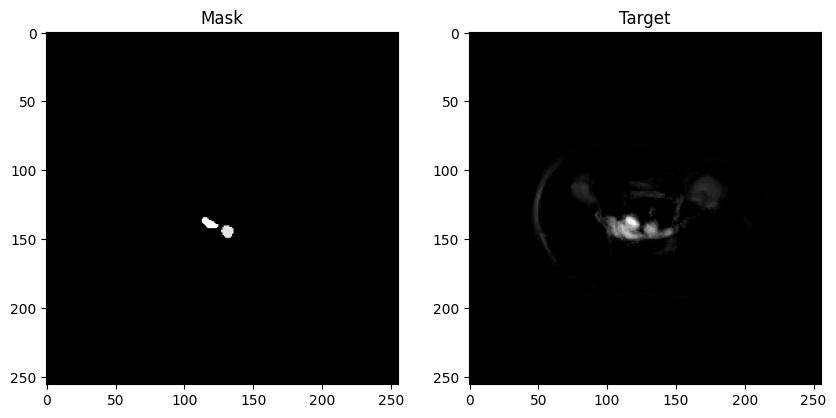

 13%|█▎        | 31/240 [01:09<09:00,  2.59s/it]

Loss: 0.0606


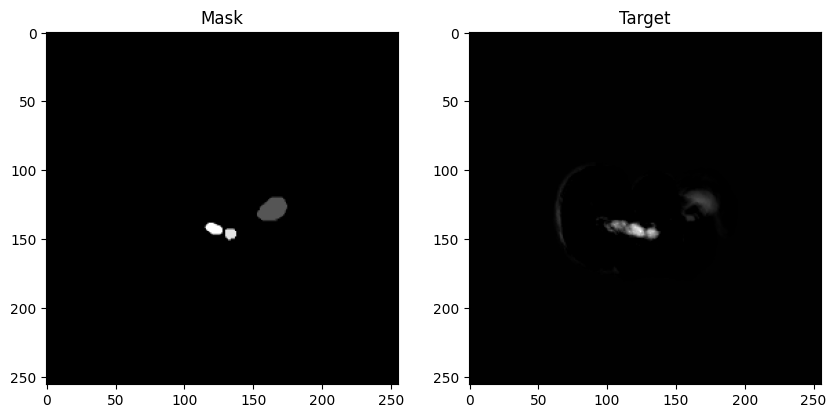

 13%|█▎        | 32/240 [01:11<08:23,  2.42s/it]

In [26]:
for epoch in range(num_epochs):
    running_loss = 0.0
    for i, (img, mask, path) in enumerate(tqdm(data)):
        img = img.to(device)
        mask = mask.to(device).float()
        # print(mask.shape)
        
        optimizer.zero_grad()
        outputs = model(mask)

        # Loss 계산
        current_loss = loss(outputs, mask)  # target은 정답 레이블로, 알맞게 데이터셋에서 가져와야 합니다.

        # Backward 단계
        current_loss.backward()

        # 가중치 갱신
        optimizer.step()

        # 누적 Loss 값 계산
        running_loss += current_loss.item()
        
        print(f"Loss: {running_loss / 100:.4f}")
        
        mask_np = mask[0, crop_size // 2, ...].detach().cpu().numpy()
        target_np = outputs[0, crop_size // 2, ...].detach().cpu().numpy()
        
        plt.figure(figsize=(10, 5))
        plt.subplot(1, 2, 1)
        plt.imshow(mask_np, cmap='gray')
        plt.title("Mask")
        
        plt.subplot(1, 2, 2)
        plt.imshow(target_np, cmap='gray')
        plt.title("Target")
        
        plt.show()

        if i % 100 == 99:    # 100번 반복마다 Loss 출력
            print(f'Epoch {epoch+1}, Batch {i+1}, Loss: {running_loss / 100:.4f}')
            running_loss = 0.0